# Lab. Ex.: 9: Ensemble Classifications

## Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing 

In [2]:
# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Select relevant features and target variable
data= data[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

#Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
data["Sex"]=LabelEncoder().fit_transform(data["Sex"])
data["Embarked"]=LabelEncoder().fit_transform(data["Embarked"])

#Splitting data into features and target variables
X=data.drop(columns=["Survived"])
y=data["Survived"]

#Splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Standardizing numerical features
gscaler=StandardScaler()
X_train=gscaler.fit_transform(X_train)
X_test=gscaler.transform(X_test)



### Defining Models and Visualization


Support Vector Machine Classifier Performance:
Accuracy: 0.825175
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        80
           1       0.87      0.71      0.78        63

    accuracy                           0.83       143
   macro avg       0.83      0.81      0.82       143
weighted avg       0.83      0.83      0.82       143



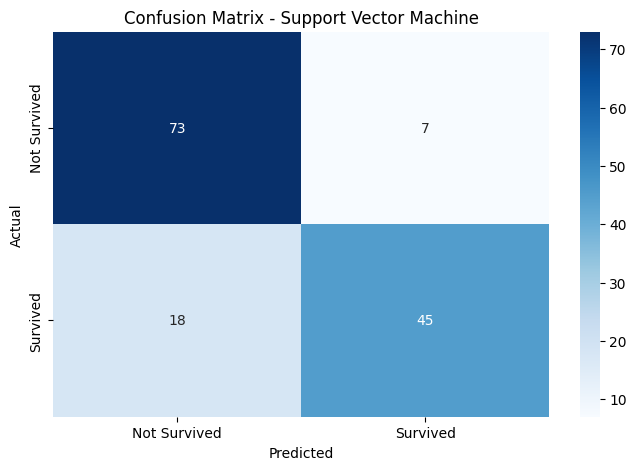


Multilayer Perceptron Classifier Performance:
Accuracy: 0.776224
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        80
           1       0.75      0.75      0.75        63

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



c:\Users\IRENE SARA THOMAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


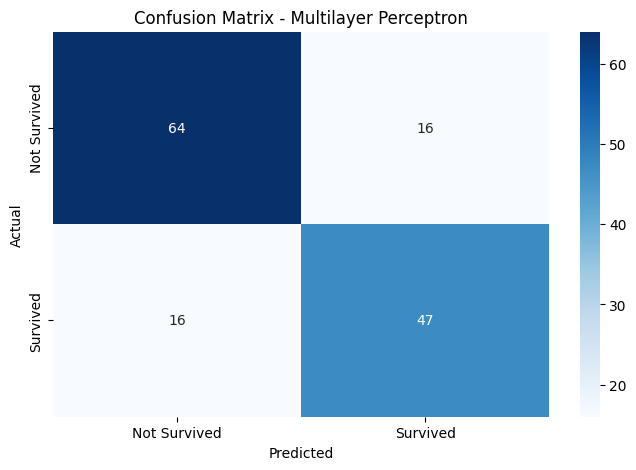


Random Forest Classifier Performance:
Accuracy: 0.783217
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        80
           1       0.78      0.71      0.74        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143



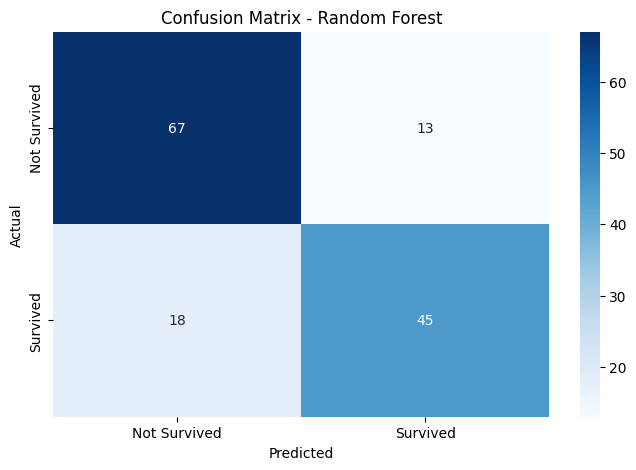


Gradient Boosting Classifier Performance:
Accuracy: 0.769231
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        80
           1       0.78      0.67      0.72        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



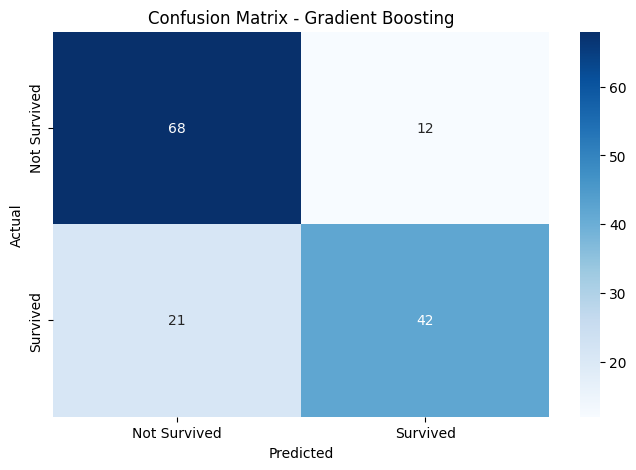

In [3]:
# Define models
models={
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results={}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    results[name]=acc
    print(f"\n{name} Classifier Performance:")
    print(f"Accuracy: {acc:4f}")
    print(classification_report(y_test,y_pred))

    #Confusion Matrix
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()




### Comparison of models

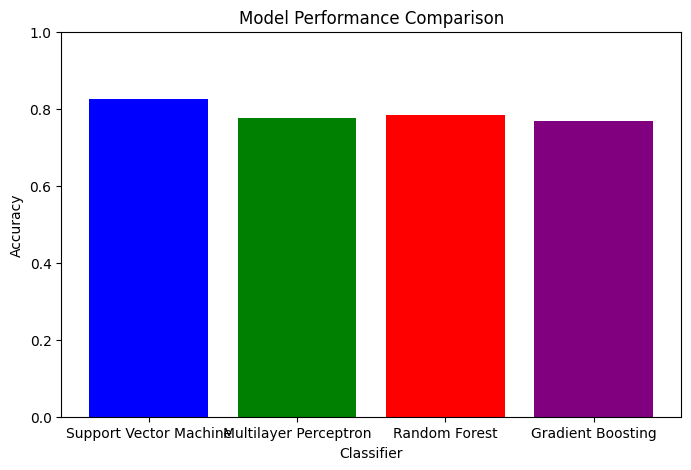

In [4]:
# Compare model performances
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()